     month_nu  day_nu  begin_yr  max_va       fRate
0          12       1      2012    5490  155.459232
1          12       2      2012    8170  231.348256
2          12       3      2012    8040  227.667072
3          12       4      2012   10100  285.999680
4          12       5      2012    9130  258.532384
..        ...     ...       ...     ...         ...
171         5      21      2013     452   12.799194
172         5      22      2013     854   24.182547
173         5      23      2013     842   23.842746
174         5      24      2013     817   23.134826
175         5      25      2013     757   21.435818

[176 rows x 5 columns]


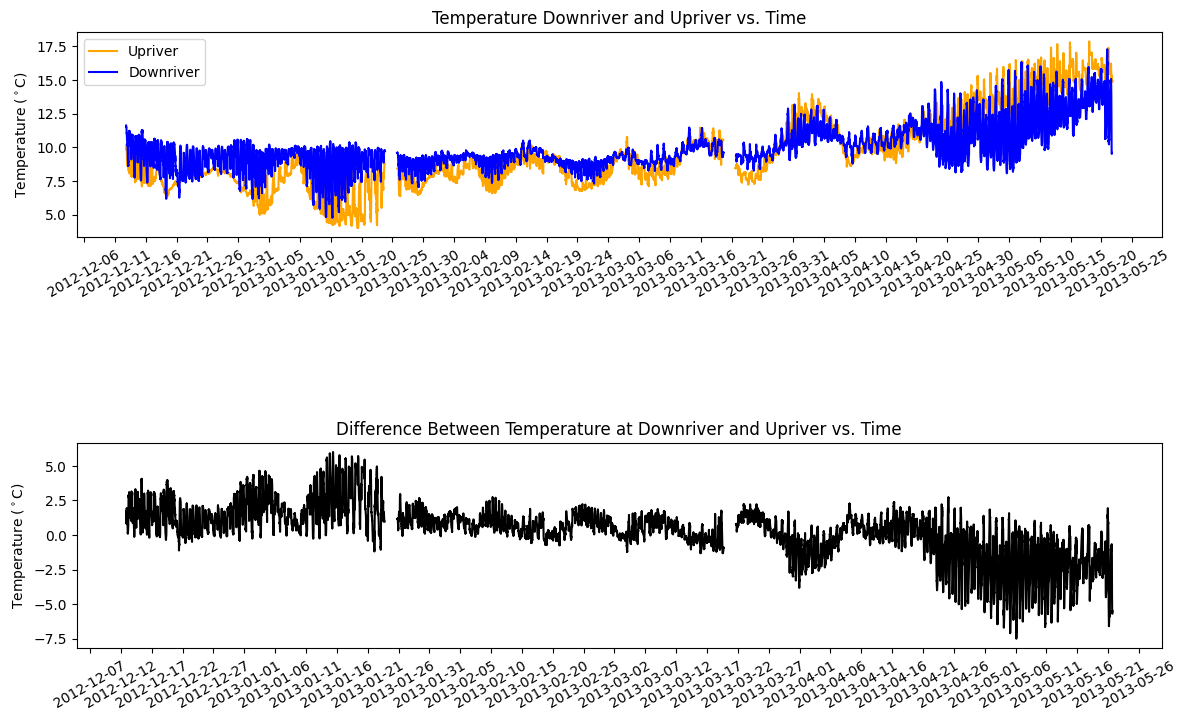

In [2]:
import pandas as pd
import scipy.io as sio
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

#import down river data
matDataD1 = sio.loadmat('2012-13\\mcat_dnriver_7162_Dep1.mat')
matDataD2 = sio.loadmat('2012-13\\mcat_dnriver_7162_Dep2.mat')
matDataD3 = sio.loadmat('2012-13\\mcat_dnriver_7162_Dep3.mat')

#import upriver data
matDataU1 = sio.loadmat('2012-13\\mcat_upriver_6865_Dep1.mat')
matDataU2 = sio.loadmat('2012-13\\mcat_upriver_6865_Dep2.mat')
matDataU3 = sio.loadmat('2012-13\\mcat_upriver_6865_Dep3.mat')

#mat lab date origin
origin = np.datetime64('0000-01-01', 'D') - np.timedelta64(1, 'D')

#combining the downriver data
matDataD1Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD1.items() if dictKey[0] != '_'}
matD1DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD1Filtered.items()})
matDataD2Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD2.items() if dictKey[0] != '_'}
matD2DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD2Filtered.items()})
matDataD3Filtered = {dictKey:dictValue for dictKey, dictValue in matDataD3.items() if dictKey[0] != '_'}
matD3DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataD3Filtered.items()})

matDDF = pd.concat([matD1DF, matD2DF, matD3DF])
tmsDownriver = matDDF['DN'] * np.timedelta64(1, 'D') + origin


#combining the upriver data
matDataU1Filtered = {dictKey:dictValue for dictKey, dictValue in matDataU1.items() if dictKey[0] != '_'}
matU1DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataU1Filtered.items()})
matDataU2Filtered = {dictKey:dictValue for dictKey, dictValue in matDataU2.items() if dictKey[0] != '_'}
matU2DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataU2Filtered.items()})
matDataU3Filtered = {dictKey:dictValue for dictKey, dictValue in matDataU3.items() if dictKey[0] != '_'}
matU3DF = pd.DataFrame({dictKey: np.array(dictValue).flatten() for dictKey, dictValue in matDataU3Filtered.items()})

matUDF = pd.concat([matU1DF, matU2DF, matU3DF])
tmsUpriver = matUDF['DN'] * np.timedelta64(1, 'D') + origin

#reading in flow data
flowDF = pd.read_csv('2012_2013alsea.csv')
flowDF['fRate'] = flowDF['max_va'] * 0.0283168
print(flowDF)
#making up for missing data values in DDF, and not matching time stamps
matDiff = pd.merge_asof(left = matDDF, right = matUDF, on = 'DN')
matDiff['deltaT'] = matDiff['T_x']-matDiff['T_y']
tmsDiff = matDiff['DN'] * np.timedelta64(1, 'D') + origin

#plotting subplots
fig, (ax,axdiff) = plt.subplots(2,figsize=(14, 8))
ax.set_title("Temperature Downriver and Upriver vs. Time")
#add second plot below that shows temperature difference
axdiff.set_title("Difference Between Temperature at Downriver and Upriver vs. Time")
plt.setp(ax, ylabel = "Temperature ($^\circ$C)")
plt.setp(axdiff, ylabel = "Temperature ($^\circ$C)")
ax.plot(tmsUpriver, matUDF['T'], color = 'orange', label='Upriver')
ax.plot(tmsDownriver,matDDF['T'], color = 'blue', label = 'Downriver')
axdiff.plot(tmsDownriver,matDiff['deltaT'],color = 'black', label = "Difference")

# Change the tick interval
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
axdiff.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# Puts x-axis labels on an angle
ax.xaxis.set_tick_params(rotation = 30)  
axdiff.xaxis.set_tick_params(rotation = 30)
plt.subplots_adjust(hspace=1)

ax.legend() 
plt.show()
